In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:
df.shape

(20640, 10)

In [31]:
df.dropna(inplace = True)

In [32]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [34]:
df.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

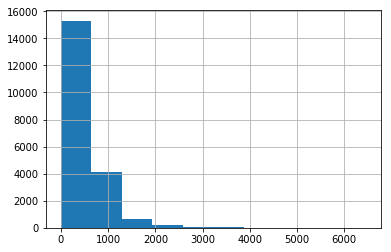

In [35]:
df.total_bedrooms.hist()

In [8]:
import seaborn as sns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
df_dum = pd.get_dummies(df, columns = ['ocean_proximity'])

In [11]:
df_dum.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


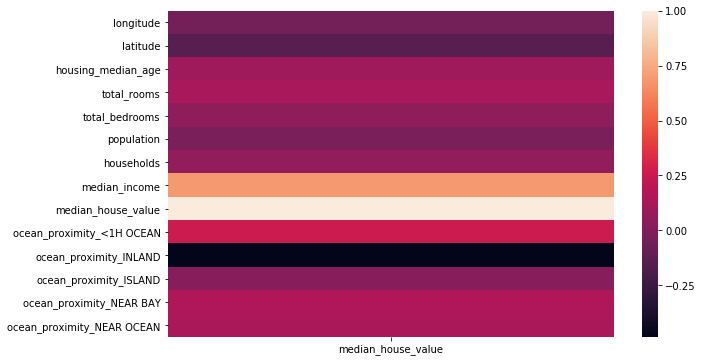

In [14]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_dum.corr()[['median_house_value']])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_dum[['total_rooms', 'housing_median_age', 'ocean_proximity_NEAR BAY', 'median_income', 'ocean_proximity_INLAND']]
y = df_dum['median_house_value']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
preds = lr.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
np.sqrt(mean_squared_error(y_test, preds))

73897.96468103587

In [48]:
lr.coef_

array([ 3.56443336e+00,  1.12777138e+03,  5.60933521e+03,  3.75006834e+04,
       -7.60619022e+04])

In [49]:
pd.DataFrame({'Features': ['total_rooms', 'housing_median_age', 'ocean_proximity_NEAR BAY', 'median_income', 'ocean_proximity_INLAND'], 'coefs': lr.coef_})

,Features,coefs
0,total_rooms,3.564433
1,housing_median_age,1127.771378
2,ocean_proximity_NEAR BAY,5609.335207
3,median_income,37500.683370
4,ocean_proximity_INLAND,-76061.902171


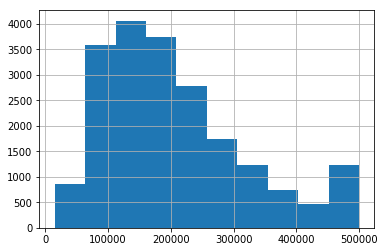

In [50]:
df_dum.median_house_value.hist()

In [51]:
df_dum.housing_median_age.describe()

count    20433.000000
mean        28.633094
std         12.591805
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [52]:
df_dum[df['housing_median_age'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,0,1,0,0,0
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,0,1,0,0,0
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,0,1,0,0,0
19536,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,0,1,0,0,0


In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn = KNeighborsRegressor()

In [56]:
knn.fit(df[['total_rooms']], df.median_house_value)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [59]:
preds = knn.predict(df[['total_rooms']])

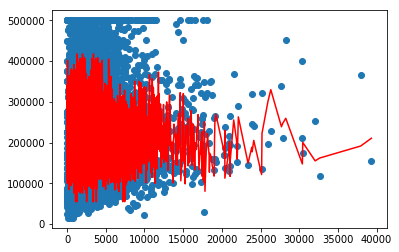

In [62]:
plt.scatter(df.total_rooms, df.median_house_value)
plt.plot(df.total_rooms.sort_values(),preds, 'r')